In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [96]:
import seaborn as sns

1.Take the PoliceKillingUS Dataset.

In [97]:
data=pd.read_csv('D:\datas\PoliceKillingsUS.csv',encoding='latin1')

In [98]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [99]:
data.shape

(2535, 14)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


2. Perform DataCleaning using SimpleImputer, LogisticRegression techniques

In [101]:
data['date']=pd.to_datetime(data['date'])

In [102]:
data['armed'].value_counts()

gun                        1398
knife                       373
vehicle                     177
unarmed                     171
undetermined                117
                           ... 
oar                           1
hand torch                    1
pole                          1
baseball bat and bottle       1
machete and gun               1
Name: armed, Length: 68, dtype: int64

In [132]:
cat_cols=[]
for col in data.select_dtypes('object'):
    if col!='name':
        data[col]=data[col].astype('category')
        #cat_cols.append(col)

In [104]:
cat_cols

['manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee']

In [105]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [106]:
SI_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)

In [107]:
for col in cat_cols:
    if data[col].isnull().sum()!=0:
        data[col]=SI_cat.fit_transform(data[[col]])

In [108]:
SI_num=SimpleImputer(missing_values=np.nan, strategy='median', copy=False)

In [109]:
data['age']=SI_num.fit_transform(data[['age']])

3.a)Top 10 cities which have most number of fatal shootings

In [110]:
data['city'].value_counts().nlargest(10)

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

3.b)Age group of people killed along with reasons why were they killed and how were they killed

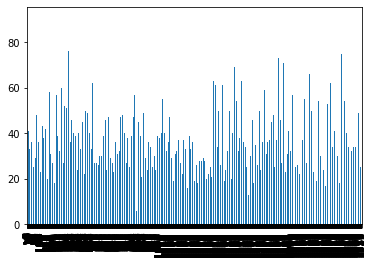

In [111]:
data['age'].plot(kind='bar')

In [112]:
data['age'].describe()

count    2535.000000
mean       36.526233
std        12.839056
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [113]:
bins=[0,10,18,30,40,50,100]
labels=['Child','teens','twenties','thirties', 'forties', 'old']
data['Age_group']=pd.cut(data.age, bins=bins, labels=labels)

In [114]:
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_group
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,old
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,forties
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,twenties
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,thirties
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,thirties
5,11,Kenneth Joe Brown,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,teens
6,13,Kenneth Arnold Buck,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,twenties
7,15,Brock Nichols,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,thirties
8,16,Autumn Steele,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,thirties
9,17,Leslie Sapp III,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,forties


In [115]:
age_shots=pd.crosstab(data['Age_group'],data['manner_of_death'])
age_shots

manner_of_death,shot,shot and Tasered
Age_group,,
Child,1,0
teens,97,7
twenties,774,48
thirties,725,57
forties,389,36
old,377,24


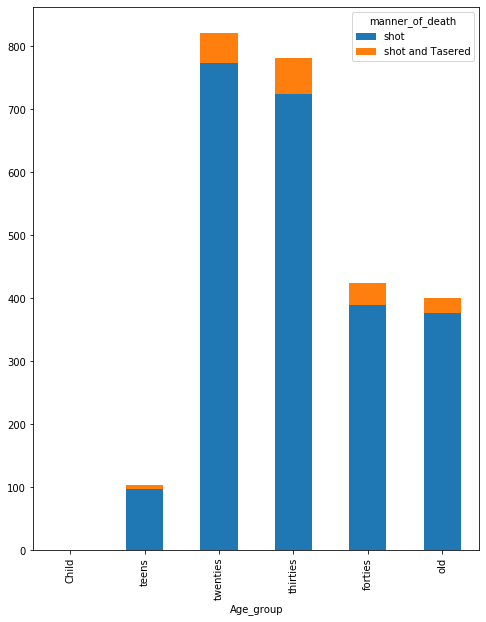

In [116]:
age_shots.plot(kind='bar', stacked=True, legend=True, figsize=(8,10))
plt.show()

3.c)Visualize geographic locations using plotly

In [117]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)


In [118]:
map_data=dict(type='choropleth', locations=data['state'], colorscale='Reds', text=data['state'], marker=dict(line=dict(color='rgb(255,0,0)',width=2)), z=data['age'], colorbar=dict(title='age range'))

In [119]:
map_layout= dict(title='police killings in USA', geo=dict(scope='usa',showlakes=True, lakecolor='rgb(0,0,255)'))

In [120]:
map_actual=go.Figure(data=[map_data], layout=map_layout)

In [121]:
iplot(map_actual)

4.Perform Label Encoding.

In [122]:
data['state'].nunique()

51

In [123]:
n=data['state'].value_counts()

In [124]:
vals=n[:22].index
print (vals)

CategoricalIndex(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO',
                  'WA', 'IL', 'TN', 'LA', 'NM', 'PA', 'AL', 'VA', 'NY', 'SC',
                  'KY', 'IN'],
                 categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', ...], ordered=False, dtype='category')


In [125]:
data['state']=data.state.where(data.state.isin(vals),'other')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.



In [126]:
data['state'].nunique()

23

In [127]:
np.cumsum(data['city'].value_counts().nlargest(100))

Los Angeles     39
Phoenix         70
Houston         97
Chicago        122
Las Vegas      143
              ... 
Chico          835
Antioch        839
Rapid City     843
Cleveland      847
Huntsville     851
Name: city, Length: 100, dtype: int64

In [140]:
data=data.drop(['city','name','armed'], axis=1)

In [141]:
data.shape

(2535, 12)

In [133]:
data.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                  category
armed                            category
age                               float64
gender                           category
race                             category
state                            category
signs_of_mental_illness              bool
threat_level                     category
flee                             category
body_camera                          bool
Age_group                        category
dtype: object

In [130]:
from sklearn.preprocessing import LabelEncoder

In [134]:
le=LabelEncoder()

In [137]:
for col in data.select_dtypes(('category','bool')):
    data[col]=le.fit_transform(data[col].astype('str'))


In [180]:
data=data.drop('date', axis=1)

In [181]:
data.head()

,id,manner_of_death,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_group
0,3,0,1,0,21,1,0,2,0,2
1,4,0,1,5,22,0,0,2,0,1
2,5,1,1,2,22,0,1,2,0,5
3,8,0,1,5,2,1,0,2,0,4
4,9,0,1,2,3,0,0,2,0,4


In KNN, plot the optimum K and use hamming distance for calculating the distance metric. If possible, try to implement hamming distance manually.

In [182]:
y=data['manner_of_death']
x=data.drop('manner_of_death', axis=1)

In [183]:
y.shape

(2535,)

In [184]:
x.shape

(2535, 9)

In [185]:
from sklearn.model_selection import StratifiedKFold

In [186]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=True)

In [187]:
for train_index, test_index in folds.split(x,y):
    x_train,x_test=x.iloc[train_index], x.iloc[test_index]
    y_train,y_test=y.iloc[train_index], y.iloc[test_index]

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
neighbors=np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [220]:
for i, j in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=j)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)

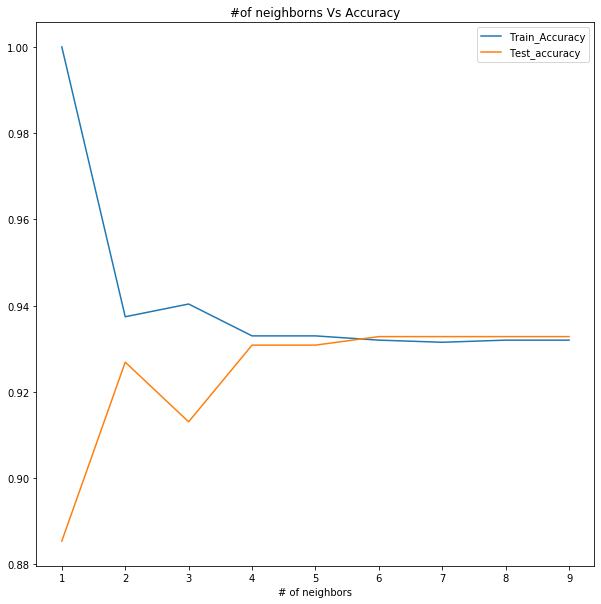

In [221]:
plt.figure(figsize=(10,10))
plt.plot(neighbors,train_accuracy, label='Train_Accuracy')
plt.plot(neighbors,test_accuracy, label='Test_accuracy')
plt.title('#of neighborns Vs Accuracy')
plt.legend()
plt.xlabel('# of neighbors')
plt.show()

k=2 is gives the max accuracy without any overfitting

In [222]:
knn=KNeighborsClassifier(n_neighbors=2)

In [223]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [224]:
knn.score(x_test,y_test)

0.9268774703557312

In [225]:
y_pred=knn.predict(x_test)

In [226]:
from sklearn.metrics import confusion_matrix, classification_report

In [227]:
confusion_matrix(y_test,y_pred)

array([[468,   4],
       [ 33,   1]], dtype=int64)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       472
           1       0.20      0.03      0.05        34

    accuracy                           0.93       506
   macro avg       0.57      0.51      0.51       506
weighted avg       0.88      0.93      0.90       506



Fine-tune the parameters of KNN by using GridSearchCV.

In [207]:
from sklearn.model_selection import GridSearchCV

In [229]:
params={'n_neighbors':np.arange(1,25)}

In [230]:
knn=KNeighborsClassifier()

In [231]:
knn_cv=GridSearchCV(knn, params, cv=5)
knn_cv.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [232]:
knn_cv.best_score_

0.9275505174963036

In [233]:
knn_cv.best_params_

{'n_neighbors': 24}